Let us first take a look at the basic data structures of Qiskit. The fundamental object that we will work with is a *Quantum Circuit*, represented by an instance of the class `QuantumCircuit`. At the time of creation, a quantum circuit is set up with two registers - one `QuantumRegister` that holds the actual quantum state and one `ClassicalRegister` which holds the results of measurements. The classical register is optional. To illustrate this, let us create a quantum circuit with two qubits. We name our registers, but this is optional.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
%matplotlib inline
q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
circuit = QuantumCircuit(q, c)

Now let us add gates. We talk about gates more below, but to see a first example we simply add a Pauli X gate. This is done by calling an appropriate method of the circuit, passing the qubit on which the gate acts as parameters. Qubits, i.e. member of a quantum register, can be specified using the usual array syntax.

In [2]:
circuit.x(q[0])

A nice feature of Qiskit is the ability to draw circuits. There are several drawers available, we will use the one based on matplotlib. Let us try this for the circuit that we have just created.

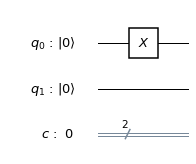

In [3]:
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer
my_style = {'cregbundle': True}
drawer(circuit, style=my_style)

And we can export our circuit as QASM code. 

Let us now try a few simulations. Qiskit comes with several local simulators built in. First, we use the QASM simulator. This simulator will execute several runs and measurements and return *counts*, i.e. for each member of the computational basis, the number of times that this member was measured. Of course, this only works if we have a measurement, so let us add measurements first.

{'01': 1000}

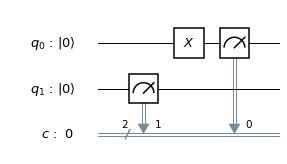

In [4]:
from qiskit import Aer
from qiskit import execute
circuit.measure(q,c)
drawer(circuit, style=my_style)
backend = Aer.get_backend('qasm_simulator') 
job = execute(circuit, backend, shots=1000)
job.result().get_counts()

Here we again see the notational conventions used in Qiskit. The rightmost bit is qubit zero. Thus the outcome 01 corresponds to $q_0 = 1$ and $q_1 = 0$. So the result is what we expect, the Pauli gate has reversed the least significant qubit. For the QASM backend, the counts are all we can get from the job.

In [5]:
job.result().get_data()

{'counts': {'01': 1000}}

However, there are other simulators that deliver more results (and consume more resources). These others simulators do not support measurements, so we set up our circuit once more, this time without measurements.

In [6]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from Aer()>,
 <QasmSimulatorPy('qasm_simulator_py') from Aer()>,
 <StatevectorSimulator('statevector_simulator') from Aer()>,
 <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>,
 <UnitarySimulator('unitary_simulator') from Aer()>,
 <CliffordSimulator('clifford_simulator') from Aer()>]

Let us use the statevector simulator. This simulator will return the actual quantum state after executing the circuit as a list of complex amplitudes, where entry i is the amplitude of $|i \rangle$, using again the convention above. So in our case, we expect that the only non-zero amplitude is that of $|01 \rangle = |1 \rangle$, which is the second element.

array([ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j])

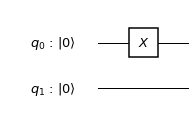

In [7]:
backend = Aer.get_backend('statevector_simulator') 
circuit = QuantumCircuit(q)
circuit.x(q[0])
drawer(circuit)
job = execute(circuit, backend)
job.result().get_statevector()

Qiskit also contains some nice features to visualize states. Let us do this for the result of our circuit.

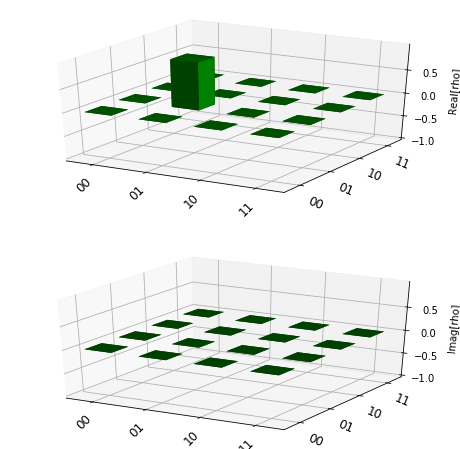

In [8]:
from qiskit.tools.visualization import plot_state
plot_state(job.result().get_statevector())

Let us now look at some more gates that are available. In general, qiskit follows the OpenQASM specifications with respect to naming and availability of specific gates. The standard (see https://arxiv.org/pdf/1707.03429.pdf) only specifies two types of gates.

First, there are one qubit gates. The basic one qubit gates are rotations, defined as usual, for instance

$$
R_X(\Theta) = \exp \left(  -i \frac{\Theta}{2} \sigma_X \right) = \cos \frac{\Theta}{2} - i \sigma_X \sin \frac{\Theta}{2}
$$
and similarly for the other Pauli matrices. Now it is well known that any rotation of the Bloch sphere can be written as a product of three rotations around y- and z-axis, i.e. in the form

$$
R_Z(\Phi)R_Y(\Theta)R_Z(\lambda)
$$

which is denoted by 

$$
U(\Theta,\Phi,\lambda)
$$

in OpenQASM and Qiskit. For instance, $U(0, 0, \lambda)$ is a rotation around the z-axis and so forth. A short calculation shows that

$$
U(\Theta,\Phi,\lambda) = \begin{pmatrix} \exp \left(-\frac{i}{2}(\Phi + \lambda)\right) \cos \frac{\Theta}{2} &
- \exp \left(-\frac{i}{2}(\Phi - \lambda)\right) \sin \frac{\Theta}{2} \\
\exp \left(\frac{i}{2}(\Phi - \lambda)\right) \sin \frac{\Theta}{2} &
\exp \left(\frac{i}{2}(\Phi + \lambda)\right) \cos \frac{\Theta}{2} \end{pmatrix}
$$

Other gates can then be built from this family of one qubit gates and the only multi-qubit gate specified by OpenQASM - the CNOT gate denoted by CX. For qiskit, the available gates are specified in QASM syntax in the file qelib1.inc (see https://github.com/Qiskit/qiskit-terra/blob/master/qiskit/qasm/libs/qelib1.inc). Let us look at some examples. First, there is of course the X gate which maps $|0 \rangle$ to $|1 \rangle$.

Result:  [ 0.+0.j  1.+0.j]


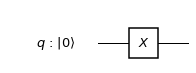

In [9]:
backend = Aer.get_backend('statevector_simulator') 
q = QuantumRegister(1,"q")
circuit = QuantumCircuit(q)
circuit.x(q[0])
drawer(circuit)
job = execute(circuit, backend)
print("Result: ", job.result().get_statevector())

Next let us visualize Y and Z gates. Let us use the unitary simulator for this, which returns the unitary matrix describing the entire circuit.

In [10]:
backend = Aer.get_backend('unitary_simulator') 
circuit = QuantumCircuit(q)
circuit.y(q[0])
job = execute(circuit, backend)
print("Y = : ", job.result().get_unitary())

circuit = QuantumCircuit(q)
circuit.z(q[0])
job = execute(circuit, backend)
print("Z = : ", job.result().get_unitary())


Y = :  [[  6.12323400e-17 +0.00000000e+00j  -6.12323400e-17 -1.00000000e+00j]
 [  6.12323400e-17 +1.00000000e+00j  -6.12323400e-17 +7.49879891e-33j]]
Z = :  [[ 1. +0.00000000e+00j  0. +0.00000000e+00j]
 [ 0. +0.00000000e+00j -1. +1.22464680e-16j]]


Thus we find that, as expected
$$
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \\
Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \\
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

Then, there is of course the Hadamard gate H, the phase gate S and its root T.

In [11]:
backend = Aer.get_backend('unitary_simulator') 
circuit = QuantumCircuit(q)
circuit.h(q[0])
job = execute(circuit, backend)
print("H = : ", job.result().get_unitary())
circuit = QuantumCircuit(q)
circuit.s(q[0])
job = execute(circuit, backend)
print("S = : ", job.result().get_unitary())
circuit = QuantumCircuit(q)
circuit.t(q[0])
job = execute(circuit, backend)
print("T = : ", job.result().get_unitary())


H = :  [[ 0.70710678 +0.00000000e+00j  0.70710678 -8.65956056e-17j]
 [ 0.70710678 +0.00000000e+00j -0.70710678 +8.65956056e-17j]]
S = :  [[  1.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   6.12323400e-17+1.j]]
T = :  [[ 1.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.70710678+0.70710678j]]


$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}1 & 1 \\ 1 & -1 \end{pmatrix}
$$
$$
S = \begin{pmatrix}1 & 0 \\ 0 & i \end{pmatrix}
$$
$$
T = \begin{pmatrix}1 & 0 \\ 0 & e^{i\frac{\pi}{4}}\end{pmatrix}
$$


We can also nicely illustrate the result of applying a Hadamard gate to the fiducial state on the Bloch sphere. The visualization routine that comes with qiskit operates on density matrices, so we need to convert our state first.

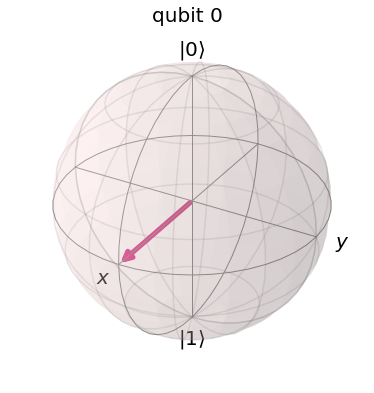

In [12]:
def state_2_rho(state):
    return np.outer(state, state.conj())
backend = Aer.get_backend('statevector_simulator') 
q = QuantumRegister(1)
circuit = QuantumCircuit(q)
circuit.h(q[0])
job = execute(circuit, backend)
statevector = job.result().get_statevector()
rho = state_2_rho(statevector)
plot_state(rho, "bloch")

If you use the formula for the gate $U(\Theta, \Phi, \lambda)$ described above and the definition of the gates from the file `qelib1.inc` to verify these results, you will find that they only hold up to a global phase which can of course be ignored as we are interested in the action on the rays and not on the Hilbert space itself.

Let us now take a look at a two qubit gate. We choose the controlled-not gate (CNOT) that is denoted as CX in the OpenQASM language. 

In [13]:
backend = Aer.get_backend('unitary_simulator') 
q = QuantumRegister(2,"q")
circuit = QuantumCircuit(q)
circuit.cx(q[0], q[1])
job = execute(circuit, backend)
print("CNOT = : ", job.result().get_unitary())

CNOT = :  [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]]


This outcome looks different than what you might see in standard textbooks, as the ordering of the basis is different than usual. However, if you work this out taking the ordering in OpenQASM into account, you see that this is really a controlled NOT gate with target qubit q[1] and control qubit q[0]. For instance, the input $|1 \rangle = |01\rangle$ corresponds to the target qubit being 0 and the control qubit being 1, so that the result is $|11\rangle = |3 \rangle$, which explains the second column of the matrix - the second basis vector $|1 \rangle$ is mapped to the last basis vector $|3 \rangle$. 

And finally, there is the option to run the circuit on the actual IBM Q experience hardware. Let us try this. This assumes that we have created the file `~/.qiskit/qiskitrc` with our API token. 

In [14]:
from qiskit import IBMQ
IBMQ.load_accounts()

In [15]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

To run a circuit on a real backend, we need to go through several steps. First, we need to get a reference to one of the available backends using the method `get_backend`. Then, the circuit is compiled, which converts it into a representation suitable for that specific backend. Finally, a `job` is created and submitted. The status of the job can then be polled on a regular basis until completion - see also https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463

QASM representation: 
 OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
x q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



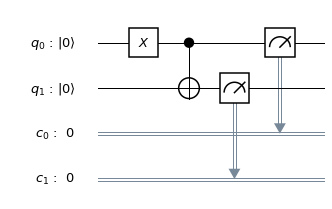

In [16]:
q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q,c)
drawer(circuit)
print("QASM representation: \n",circuit.qasm())

In [17]:
#
# The actual execution. We first get a backend and verify its status
#
#backend = IBMQ.get_backend('ibmq_16_melbourne') 
#backend = IBMQ.get_backend('ibmq_qasm_simulator') 
backend = IBMQ.get_backend('ibmqx4') 
#backend = Aer.get_backend("qasm_simulator")
print("Status of backend: ", backend.status())
#
# Now we compile
#
from qiskit import compile
qobj = compile(circuit, backend=backend, shots=1024)
#
# Display compiled QASM. Note that this actually depends on the backend!
# 
compiled_qasm = qobj.as_dict()['experiments'][0]['header']['compiled_circuit_qasm']
print("Compiled qasm:\n", compiled_qasm)

Status of backend:  {'pending_jobs': 12, 'name': 'ibmqx4', 'operational': True}
Compiled qasm:
 OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u3(1.57079632679490,3.14159265358979,3.14159265358979) q[0];
u2(0,3.14159265358979) q[1];
cx q[1],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [18]:
#
# Submit as a job and wait for completion
#
job = backend.run(qobj)
import time
lapse = 0
#
# Wait three seconds once, this should be good enough for the simulator in most cases
#
time.sleep(3)
interval = 60
while (job.status().name != 'DONE') and (job.status().name != 'CANCELLED') and (job.status().name != 'ERROR'):
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())

Status @ 0 seconds
JobStatus.QUEUED
13
Status @ 60 seconds
JobStatus.QUEUED
11
Status @ 120 seconds
JobStatus.QUEUED
9
Status @ 180 seconds
JobStatus.QUEUED
8
Status @ 240 seconds
JobStatus.QUEUED
8
Status @ 300 seconds
JobStatus.QUEUED
7
Status @ 360 seconds
JobStatus.QUEUED
7
Status @ 420 seconds
JobStatus.QUEUED
6
Status @ 480 seconds
JobStatus.QUEUED
5
Status @ 540 seconds
JobStatus.QUEUED
5
Status @ 600 seconds
JobStatus.QUEUED
4
Status @ 660 seconds
JobStatus.QUEUED
4
Status @ 720 seconds
JobStatus.QUEUED
3
Status @ 780 seconds
JobStatus.QUEUED
3
Status @ 840 seconds
JobStatus.QUEUED
2
Status @ 900 seconds
JobStatus.QUEUED
2
Status @ 960 seconds
JobStatus.QUEUED
1
Status @ 1020 seconds
JobStatus.QUEUED
1
JobStatus.DONE


In [19]:
result = job.result()
counts = result.get_counts()
counts

{'00': 28, '01': 119, '10': 77, '11': 800}